In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
fname ='dungeon performance 10.01 - 13.01' 
df = pd.read_csv(fname + '.csv')

In [4]:
df

,userId,gameModeName,sessionId,eventType,PartyMembers,entryTime,exitTime,duration,gameTime,min_fps,max_fps,p25_fps,median_fps,p75_fps,min_ping,max_ping,p25_ping,median_ping,p75_ping
0,01JHE7Q9P391YSPAVZHRCAD2W2,TUTORIAL_TIER_1,01JHE7SZZXM811PS9GF78ZKVPW,died,1,2025-01-12 21:48:06.500000 UTC,2025-01-12 21:53:57.500000 UTC,0-0 0 0:5:51,240.0,49.264735,102.747101,55.740112,61.347836,68.639513,203.800,271.60,219.600,234.00,242.00
1,01JHCJGGVQ00NSP4XYCDJDQ8B6,TUTORIAL_TIER_1,01JHCRB6AYHB5DB86PC4702KCY,extraction,1,2025-01-12 07:58:43.499000 UTC,2025-01-12 08:04:39.499000 UTC,0-0 0 0:5:56,241.0,25.119889,121.739265,34.336270,36.068422,44.717546,246.220,1838.99,250.415,256.92,314.82
2,01JH9ZDPTGSFBA4GJHSPBHVPB5,TUTORIAL_TIER_1,01JH9ZKGJ27AY9MKBBHVW8CF5R,died,1,2025-01-11 06:07:48.499000 UTC,2025-01-11 06:08:33.499000 UTC,0-0 0 0:0:45,43.0,34.742943,44.060815,34.742943,34.742943,44.060815,341.300,436.40,341.300,341.30,436.40
3,01JH4BAESJ21XH85RVZ023X5FW,TUTORIAL_TIER_3,01JH9F80TN2N8RAME7VBKFBEE8,died,1,2025-01-11 01:21:59.500000 UTC,2025-01-11 01:33:19.500000 UTC,0-0 0 0:11:20,485.0,74.276649,126.224723,84.927222,89.475726,96.161823,47.600,90.70,52.200,58.00,68.40
4,01J1FBBBMDZCWXVPCS11J6R118,LUSH_T3,01JHFY1JEHDQHVF80A164Z9FME,extraction,1,2025-01-13 13:35:57.499000 UTC,2025-01-13 13:56:18.500000 UTC,0-0 0 0:20:21.001,1010.0,52.390413,291.061308,82.294214,96.135538,114.634815,222.575,247.66,227.660,231.83,235.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,01JHB22KM08WFJN74TF3Z7BKVT,TUTORIAL_TIER_1,01JHB2AZ351FKDMFXVAS6CD5NK,died,3,2025-01-11 16:14:53.499000 UTC,2025-01-11 16:19:20.499000 UTC,0-0 0 0:4:27,83.0,78.255126,164.613399,104.748126,135.840265,154.152270,308.800,334.50,313.600,318.10,322.60
15103,01JHB8SQFARJ59WARQNP2BXT5K,TUTORIAL_TIER_1,01JHB9FE1ZR7YMZAGP8E1KN6AZ,died,3,2025-01-11 18:19:39.500000 UTC,2025-01-11 18:24:55.500000 UTC,0-0 0 0:5:16,233.0,29.196763,80.892254,37.508387,40.833722,44.814365,154.400,324.60,178.600,183.80,198.50
15104,01JH9T6QKJ05JN09XMTBTCY04G,TUTORIAL_TIER_1,01JH9TEB4V90BCK36CEPK68NZ2,died,3,2025-01-11 04:37:40.500000 UTC,2025-01-11 04:42:44.499000 UTC,0-0 0 0:5:3.999,228.0,37.635608,79.574000,46.896106,53.217670,56.492665,86.100,152.40,108.500,118.60,136.50
15105,01JH9WR0DJF84QBQ7K76VWGA5K,TUTORIAL_TIER_1,01JH9WY3ZWHVQAKH5VQ5ZDGHMX,died,3,2025-01-11 05:21:15.500000 UTC,2025-01-11 05:27:49.500000 UTC,0-0 0 0:6:34,261.0,54.120544,123.374267,72.981026,75.799080,86.220986,62.300,402.40,68.900,84.90,89.50


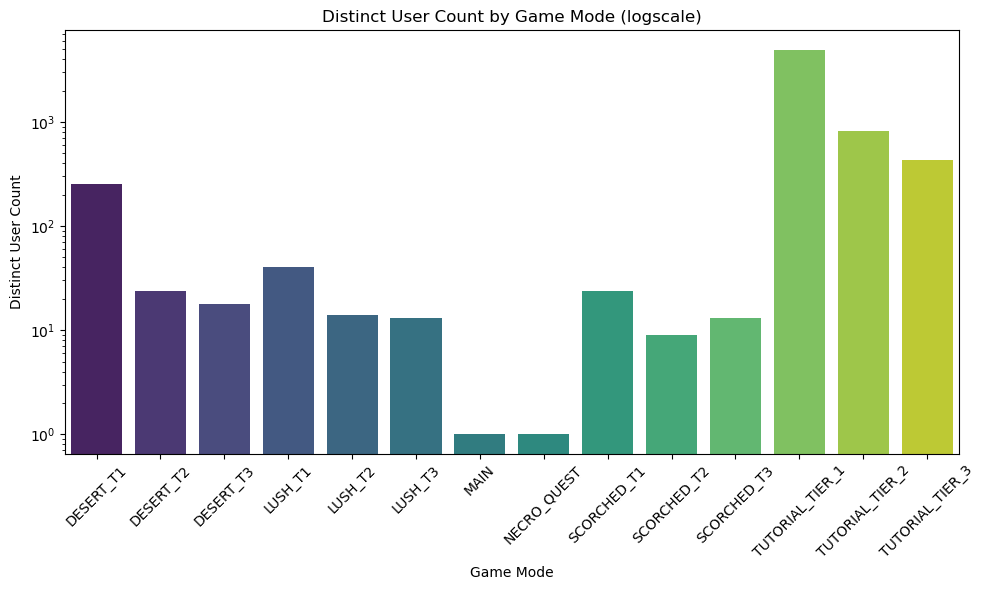

In [5]:
# Count distinct userIds in each game mode
distinct_user_counts = df.groupby("gameModeName")["userId"].nunique().reset_index()

# Rename columns for clarity
distinct_user_counts.columns = ["gameModeName", "DistinctUserCount"]

# Plot the distinct user counts
plt.figure(figsize=(10, 6))
sns.barplot(data=distinct_user_counts, x="gameModeName", y="DistinctUserCount", palette="viridis")
plt.title("Distinct User Count by Game Mode (logscale)")
plt.xlabel("Game Mode")
plt.ylabel("Distinct User Count")
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
exclude_gameModes = ['MAIN']
df = df[~df['gameModeName'].isin(exclude_gameModes)]


In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]




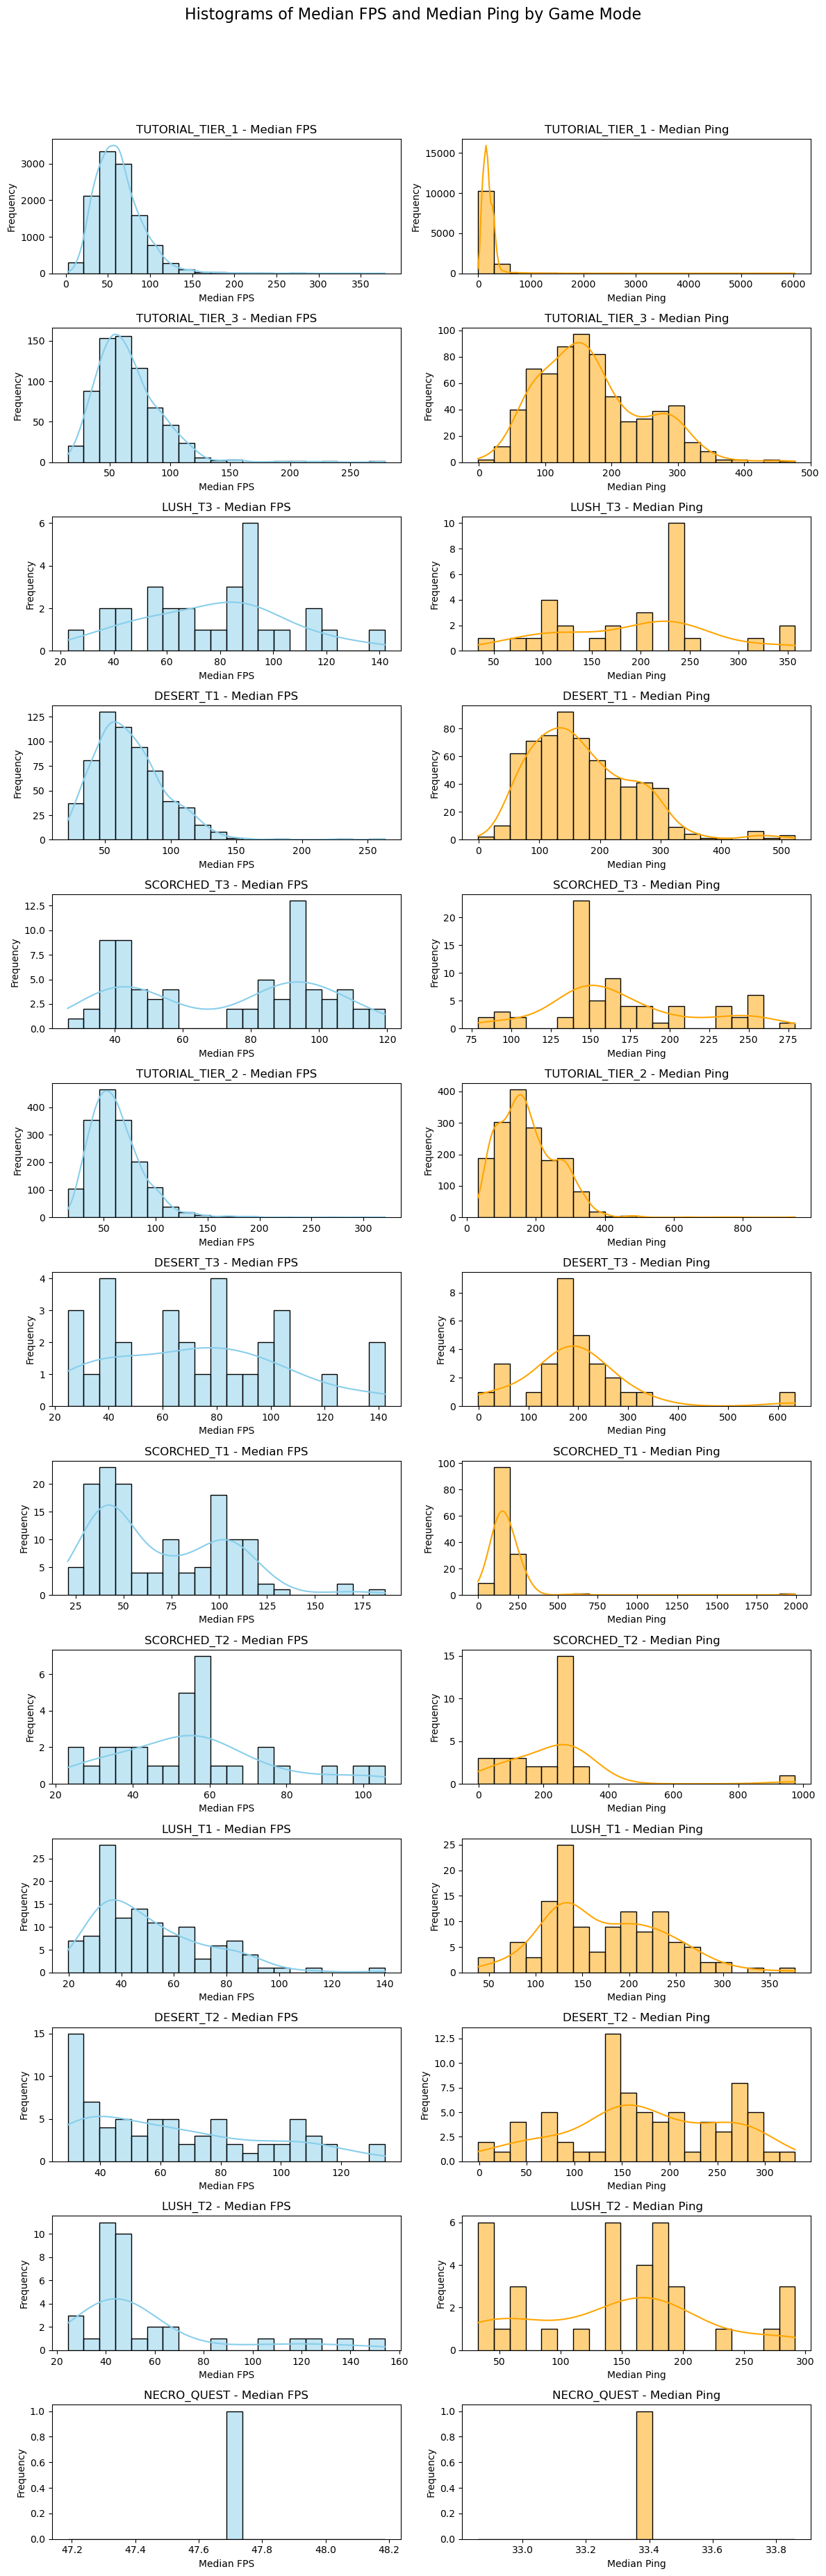

In [8]:
game_modes = df["gameModeName"].unique()

fig, axs = plt.subplots(len(game_modes), 2, figsize=(12, len(game_modes) * 3))
fig.suptitle("Histograms of Median FPS and Median Ping by Game Mode", fontsize=16)

for i, game_mode in enumerate(game_modes):
    # Filter data for the current game mode
    game_mode_data = df[df["gameModeName"] == game_mode]

    # Plot histogram for median FPS
    sns.histplot(game_mode_data["median_fps"], kde=True, bins=20, ax=axs[i, 0], color="skyblue")
    axs[i, 0].set_title(f"{game_mode} - Median FPS")
    axs[i, 0].set_xlabel("Median FPS")
    axs[i, 0].set_ylabel("Frequency")

    # Plot histogram for median Ping
    sns.histplot(game_mode_data["median_ping"], kde=True, bins=20, ax=axs[i, 1], color="orange")
    axs[i, 1].set_title(f"{game_mode} - Median Ping")
    axs[i, 1].set_xlabel("Median Ping")
    axs[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
df_filtered = df.copy()


# Add an 'isDC' column to indicate disconnections
df_filtered['isDC'] = ((df_filtered['median_ping'] < 0) | 
                       (df_filtered['max_ping'] < 0) | 
                       (df_filtered['p25_ping'] < 0) | 
                       (df_filtered['min_ping'] < 0)| 
                       (df_filtered['p75_ping'] < 0)
)

# Ensure the columns are float type before replacing -1 with NaN
columns_to_fix = ['median_ping', 'max_ping', 'p25_ping','p75_ping','min_ping']
df_filtered[columns_to_fix] = df_filtered[columns_to_fix].astype(float)

# Replace -1 values with NaN so they don't interfere with regression analysis
df_filtered[columns_to_fix] = df_filtered[columns_to_fix].replace(-1, np.nan)


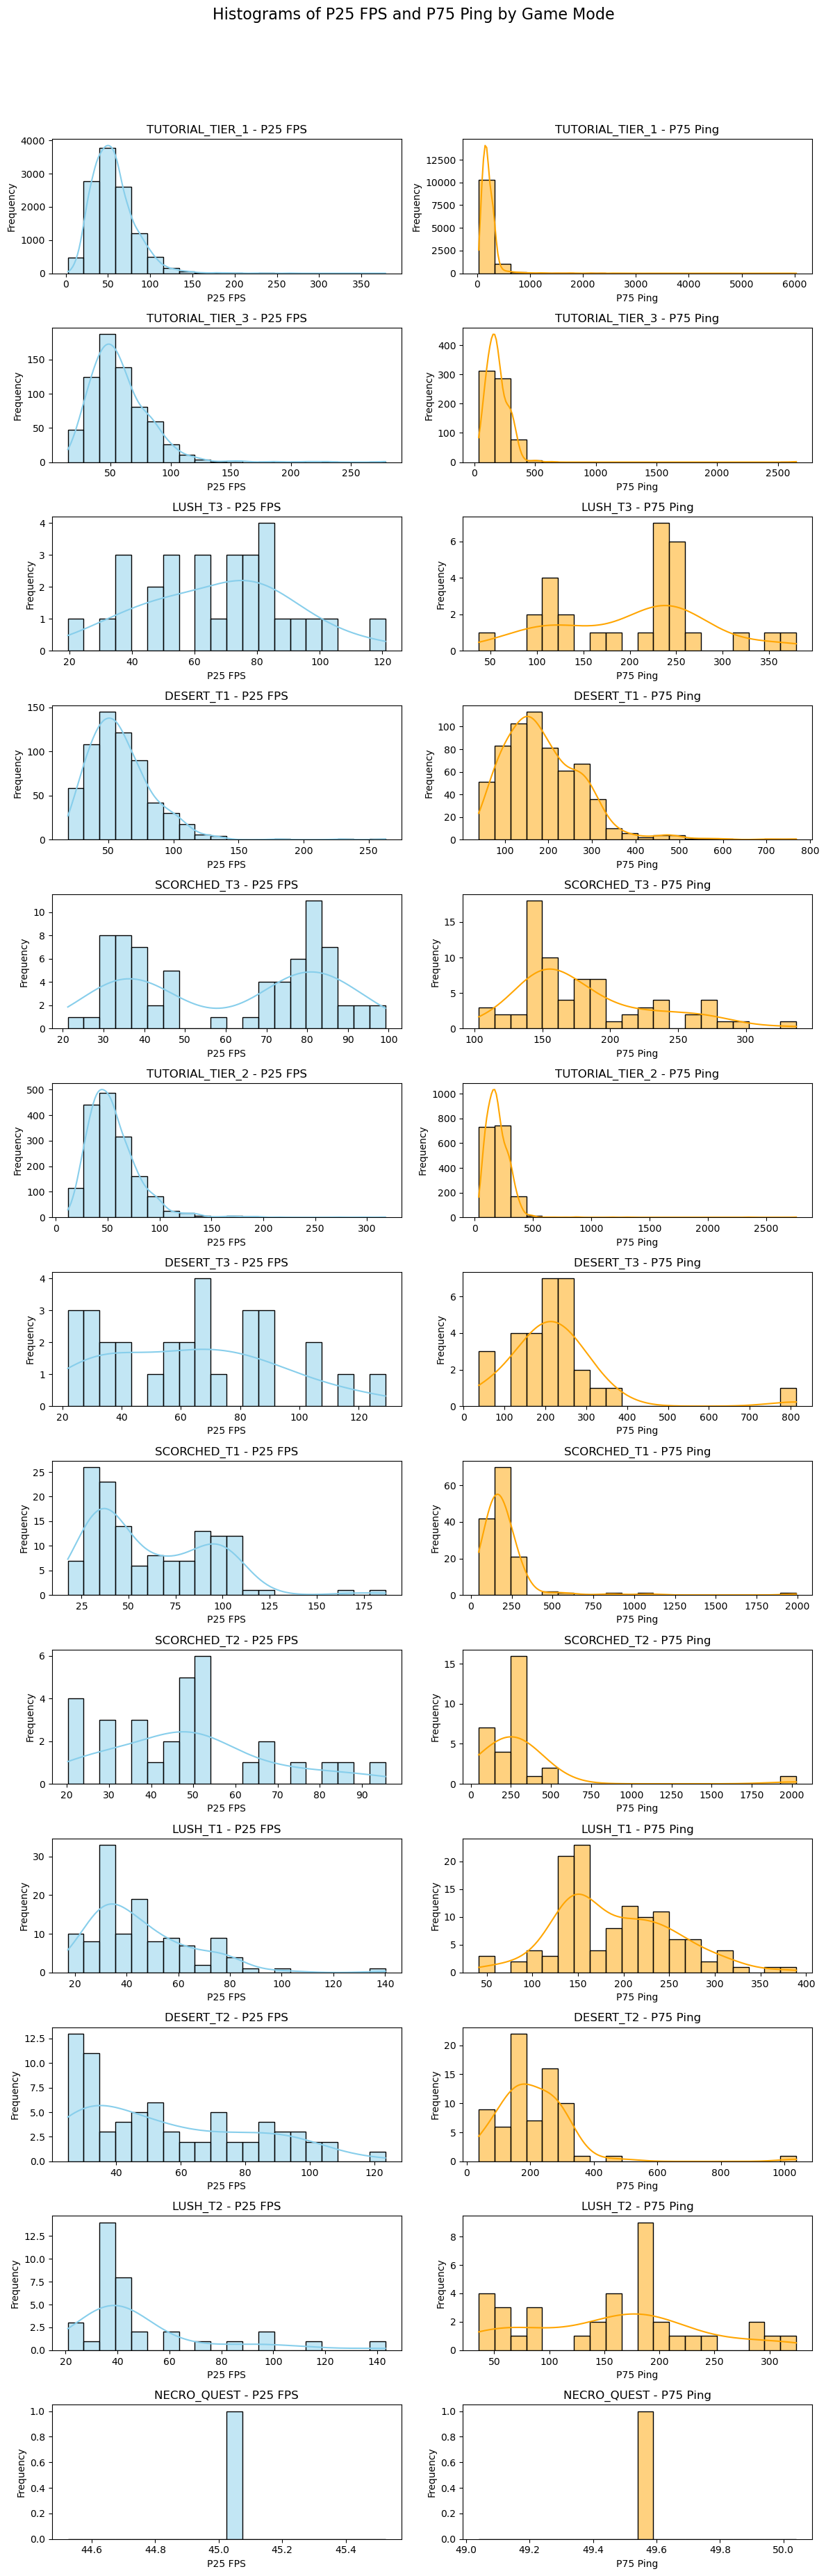

In [10]:
fig, axs = plt.subplots(len(game_modes), 2, figsize=(12, len(game_modes) * 3))
fig.suptitle("Histograms of P25 FPS and P75 Ping by Game Mode", fontsize=16)

# Ensure axs is always a 2D array
if len(game_modes) == 1:
    axs = [axs]  # Convert axs to a list for consistent indexing

# Loop through each game mode and plot histograms
for i, game_mode in enumerate(game_modes):
    # Filter data for the current game mode
    game_mode_data = df_filtered[df_filtered["gameModeName"] == game_mode]

    # Plot histogram for P25 FPS
    sns.histplot(game_mode_data["p25_fps"], kde=True, bins=20, ax=axs[i, 0], color="skyblue")
    axs[i, 0].set_title(f"{game_mode} - P25 FPS")
    axs[i, 0].set_xlabel("P25 FPS")
    axs[i, 0].set_ylabel("Frequency")

    # Plot histogram for P75 Ping
    sns.histplot(game_mode_data["p75_ping"], kde=True, bins=20, ax=axs[i, 1], color="orange")
    axs[i, 1].set_title(f"{game_mode} - P75 Ping")
    axs[i, 1].set_xlabel("P75 Ping")
    axs[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

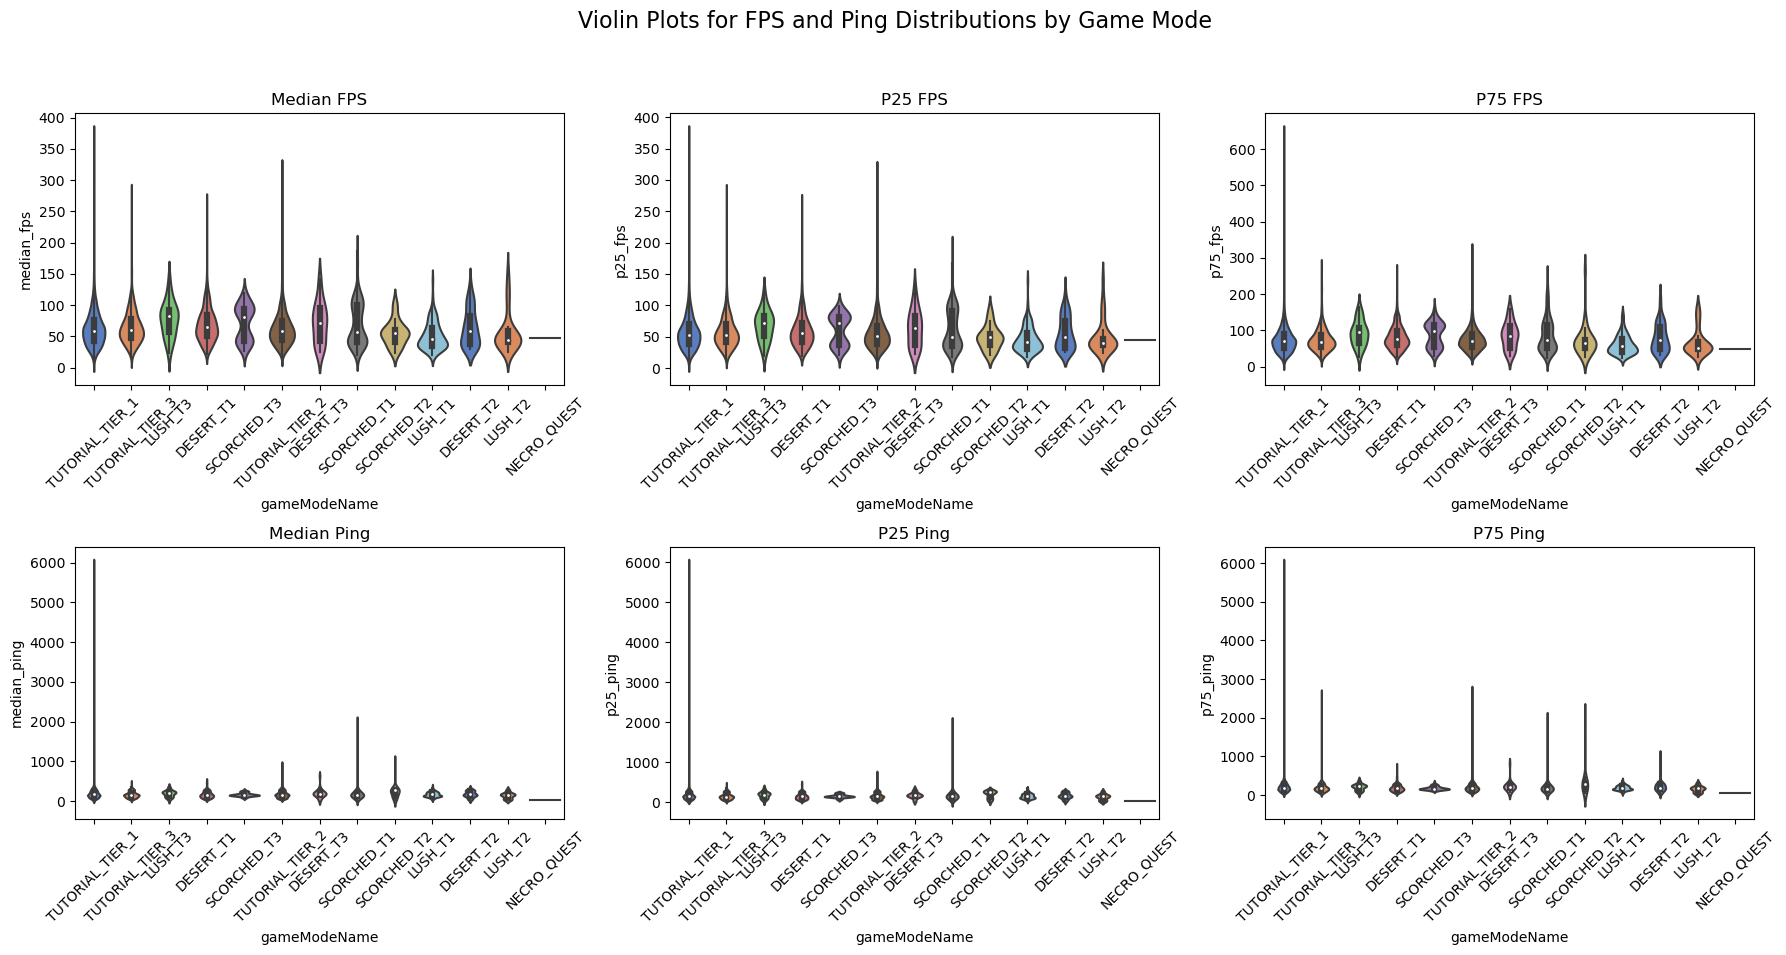

In [11]:
# Generate violin plots again with the filtered data

def violin_plots(data):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Violin Plots for FPS and Ping Distributions by Game Mode", fontsize=16)    
    # FPS Metrics
    sns.violinplot(data, x="gameModeName", y="median_fps", ax=axs[0, 0], palette="muted")
    axs[0, 0].set_title("Median FPS")
    axs[0, 0].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="gameModeName", y="p25_fps", ax=axs[0, 1], palette="muted")
    axs[0, 1].set_title("P25 FPS")
    axs[0, 1].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="gameModeName", y="p75_fps", ax=axs[0, 2], palette="muted")
    axs[0, 2].set_title("P75 FPS")
    axs[0, 2].tick_params(axis='x', rotation=45)

    # Ping Metrics
    sns.violinplot(data, x="gameModeName", y="median_ping", ax=axs[1, 0], palette="muted")
    axs[1, 0].set_title("Median Ping")
    axs[1, 0].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="gameModeName", y="p25_ping", ax=axs[1, 1], palette="muted")
    axs[1, 1].set_title("P25 Ping")
    axs[1, 1].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="gameModeName", y="p75_ping", ax=axs[1, 2], palette="muted")
    axs[1, 2].set_title("P75 Ping")
    axs[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
 
violin_plots(df_filtered)   


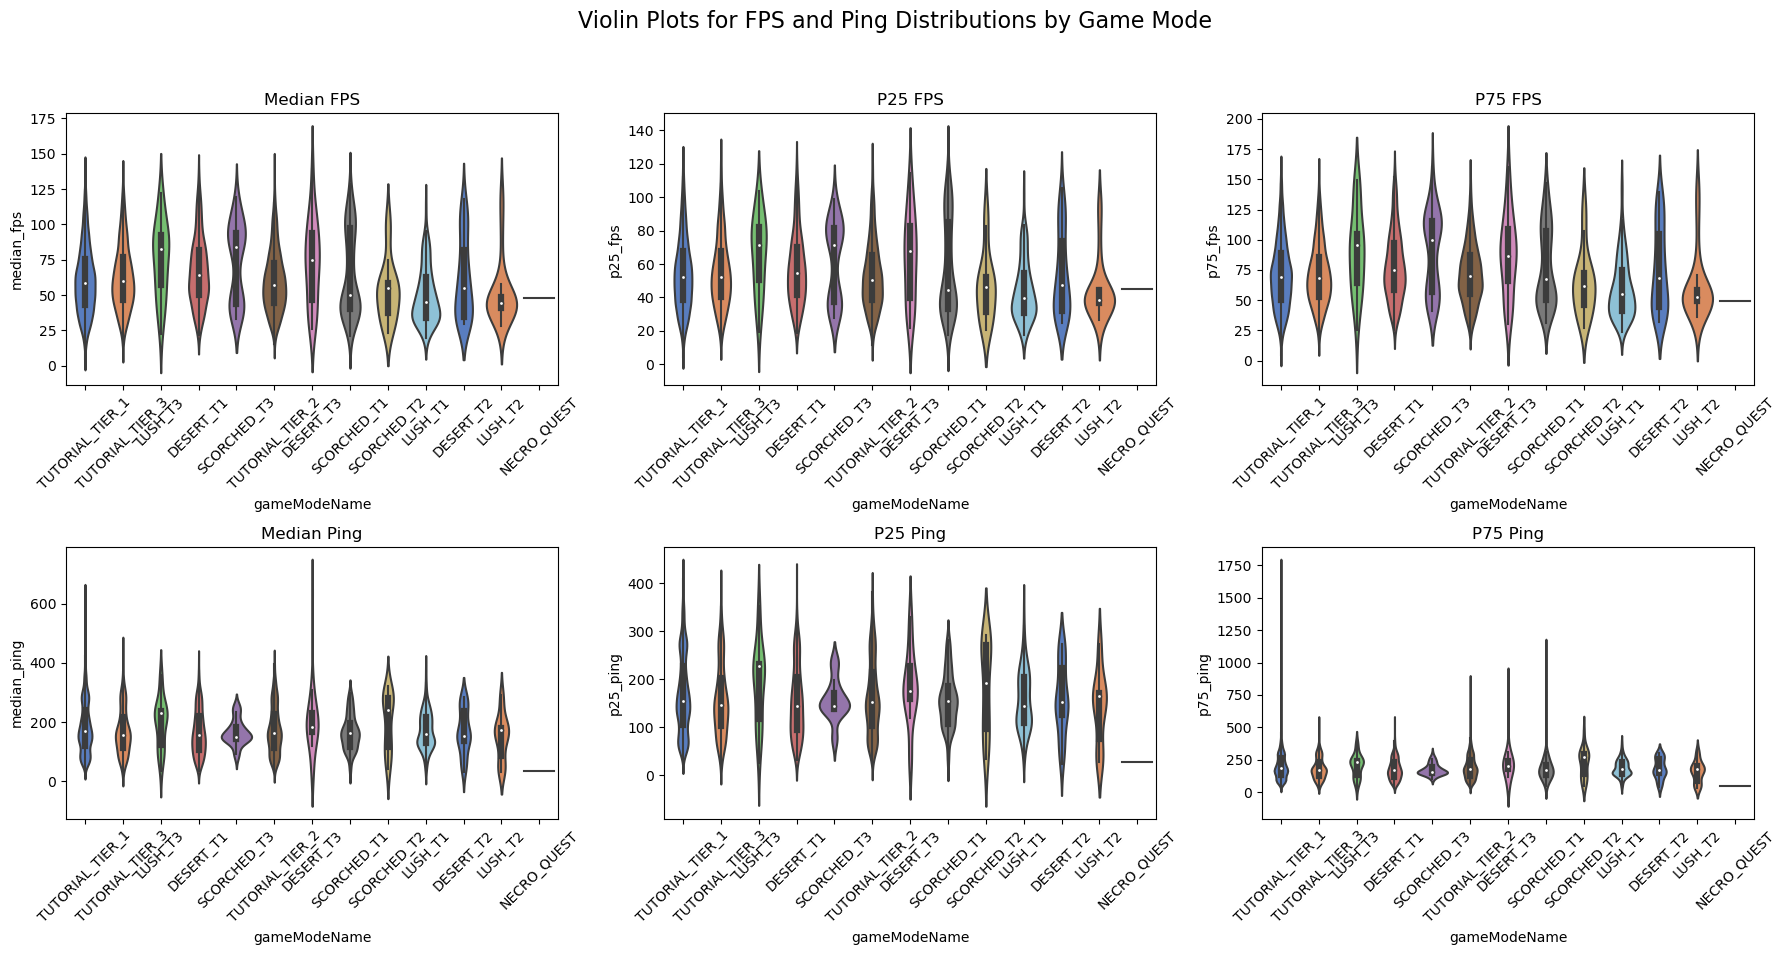

In [12]:
# remove 3*SD outliers for visualisation

def remove_outliers_3sd(df, columns):
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - 3 * std
            upper_bound = mean + 3 * std
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
columns_to_check = ['median_ping', 'max_ping', 'p25_ping', 'median_fps', 'p25_fps', 'p75_fps']

# Remove outliers
df_filtered_no_outliers = remove_outliers_3sd(df_filtered, columns_to_check)

violin_plots(df_filtered_no_outliers)   

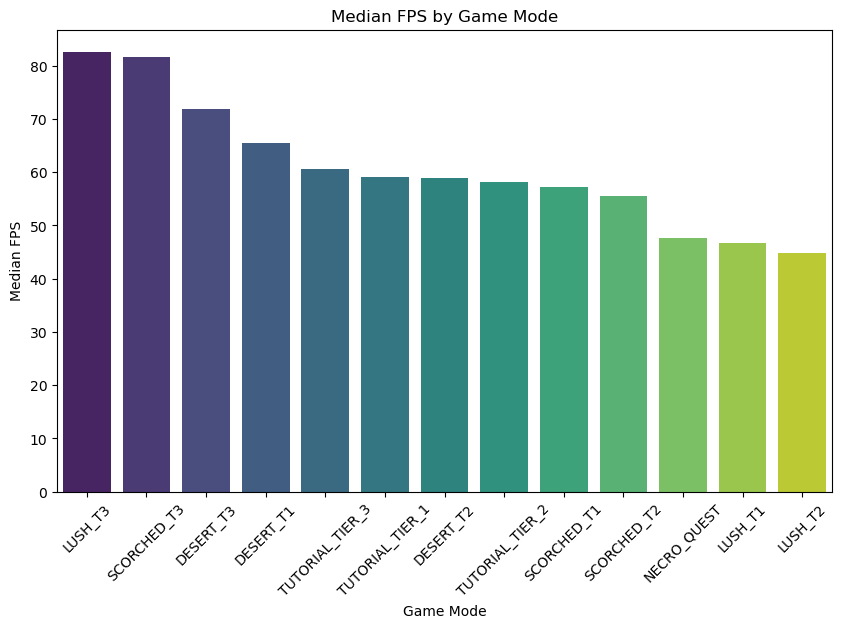

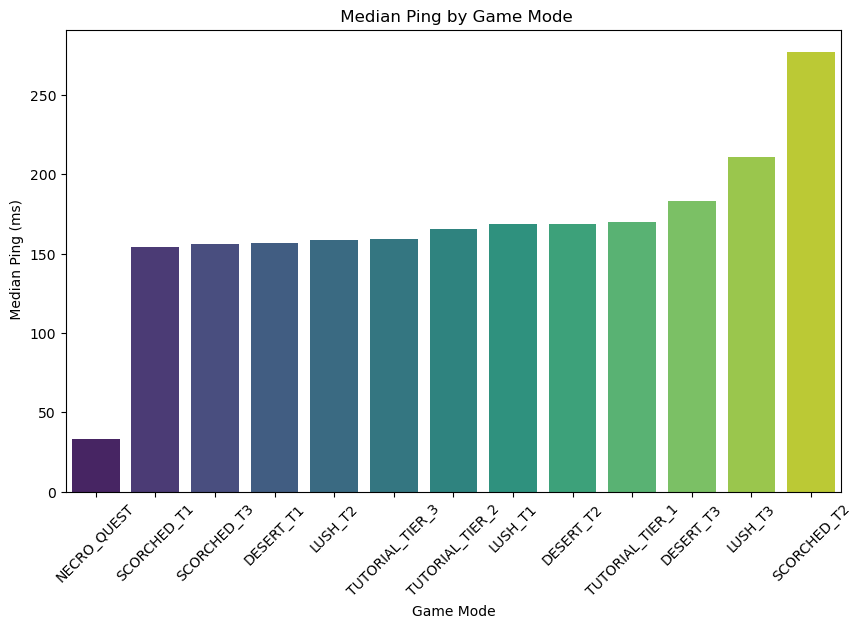

In [13]:
aggregated = df.groupby("gameModeName").agg({
    "median_fps": "median",
    "median_ping": "median"
}).sort_values(by="median_fps", ascending=False).reset_index()

# Bar chart for Median FPS
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated, x="gameModeName", y="median_fps", palette="viridis")
plt.title("Median FPS by Game Mode")
plt.ylabel("Median FPS")
plt.xlabel("Game Mode")
plt.xticks(rotation=45)
plt.show()

# Bar chart for Median Ping
aggregated = aggregated.sort_values(by="median_ping", ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated, x="gameModeName", y="median_ping", palette="viridis")
plt.title(" Median Ping by Game Mode")
plt.ylabel(" Median Ping (ms)")
plt.xlabel("Game Mode")
plt.xticks(rotation=45)
plt.show()

In [14]:
df_tutorial = df_filtered[df_filtered['gameModeName'].isin(['TUTORIAL_TIER_1', 'TUTORIAL_TIER_2', 'TUTORIAL_TIER_3'])]
df_tutorial_no_outliers  = remove_outliers_3sd(df_tutorial,columns_to_check)
df_tutorial

,userId,gameModeName,sessionId,eventType,PartyMembers,entryTime,exitTime,duration,gameTime,min_fps,max_fps,p25_fps,median_fps,p75_fps,min_ping,max_ping,p25_ping,median_ping,p75_ping,isDC
0,01JHE7Q9P391YSPAVZHRCAD2W2,TUTORIAL_TIER_1,01JHE7SZZXM811PS9GF78ZKVPW,died,1,2025-01-12 21:48:06.500000 UTC,2025-01-12 21:53:57.500000 UTC,0-0 0 0:5:51,240.0,49.264735,102.747101,55.740112,61.347836,68.639513,203.80,271.60,219.600,234.00,242.00,False
1,01JHCJGGVQ00NSP4XYCDJDQ8B6,TUTORIAL_TIER_1,01JHCRB6AYHB5DB86PC4702KCY,extraction,1,2025-01-12 07:58:43.499000 UTC,2025-01-12 08:04:39.499000 UTC,0-0 0 0:5:56,241.0,25.119889,121.739265,34.336270,36.068422,44.717546,246.22,1838.99,250.415,256.92,314.82,False
2,01JH9ZDPTGSFBA4GJHSPBHVPB5,TUTORIAL_TIER_1,01JH9ZKGJ27AY9MKBBHVW8CF5R,died,1,2025-01-11 06:07:48.499000 UTC,2025-01-11 06:08:33.499000 UTC,0-0 0 0:0:45,43.0,34.742943,44.060815,34.742943,34.742943,44.060815,341.30,436.40,341.300,341.30,436.40,False
3,01JH4BAESJ21XH85RVZ023X5FW,TUTORIAL_TIER_3,01JH9F80TN2N8RAME7VBKFBEE8,died,1,2025-01-11 01:21:59.500000 UTC,2025-01-11 01:33:19.500000 UTC,0-0 0 0:11:20,485.0,74.276649,126.224723,84.927222,89.475726,96.161823,47.60,90.70,52.200,58.00,68.40,False
7,01JHD4Z3H25TCF8JSGB8TQBRYG,TUTORIAL_TIER_1,01JHD5C6AQ210MENFNZVN3BB1H,extraction,1,2025-01-12 11:46:23.500000 UTC,2025-01-12 11:52:37.500000 UTC,0-0 0 0:6:14,253.0,44.697903,116.925168,48.816139,52.985167,63.396610,85.90,215.90,93.700,107.30,114.30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,01JHB22KM08WFJN74TF3Z7BKVT,TUTORIAL_TIER_1,01JHB2AZ351FKDMFXVAS6CD5NK,died,3,2025-01-11 16:14:53.499000 UTC,2025-01-11 16:19:20.499000 UTC,0-0 0 0:4:27,83.0,78.255126,164.613399,104.748126,135.840265,154.152270,308.80,334.50,313.600,318.10,322.60,False
15103,01JHB8SQFARJ59WARQNP2BXT5K,TUTORIAL_TIER_1,01JHB9FE1ZR7YMZAGP8E1KN6AZ,died,3,2025-01-11 18:19:39.500000 UTC,2025-01-11 18:24:55.500000 UTC,0-0 0 0:5:16,233.0,29.196763,80.892254,37.508387,40.833722,44.814365,154.40,324.60,178.600,183.80,198.50,False
15104,01JH9T6QKJ05JN09XMTBTCY04G,TUTORIAL_TIER_1,01JH9TEB4V90BCK36CEPK68NZ2,died,3,2025-01-11 04:37:40.500000 UTC,2025-01-11 04:42:44.499000 UTC,0-0 0 0:5:3.999,228.0,37.635608,79.574000,46.896106,53.217670,56.492665,86.10,152.40,108.500,118.60,136.50,False
15105,01JH9WR0DJF84QBQ7K76VWGA5K,TUTORIAL_TIER_1,01JH9WY3ZWHVQAKH5VQ5ZDGHMX,died,3,2025-01-11 05:21:15.500000 UTC,2025-01-11 05:27:49.500000 UTC,0-0 0 0:6:34,261.0,54.120544,123.374267,72.981026,75.799080,86.220986,62.30,402.40,68.900,84.90,89.50,False


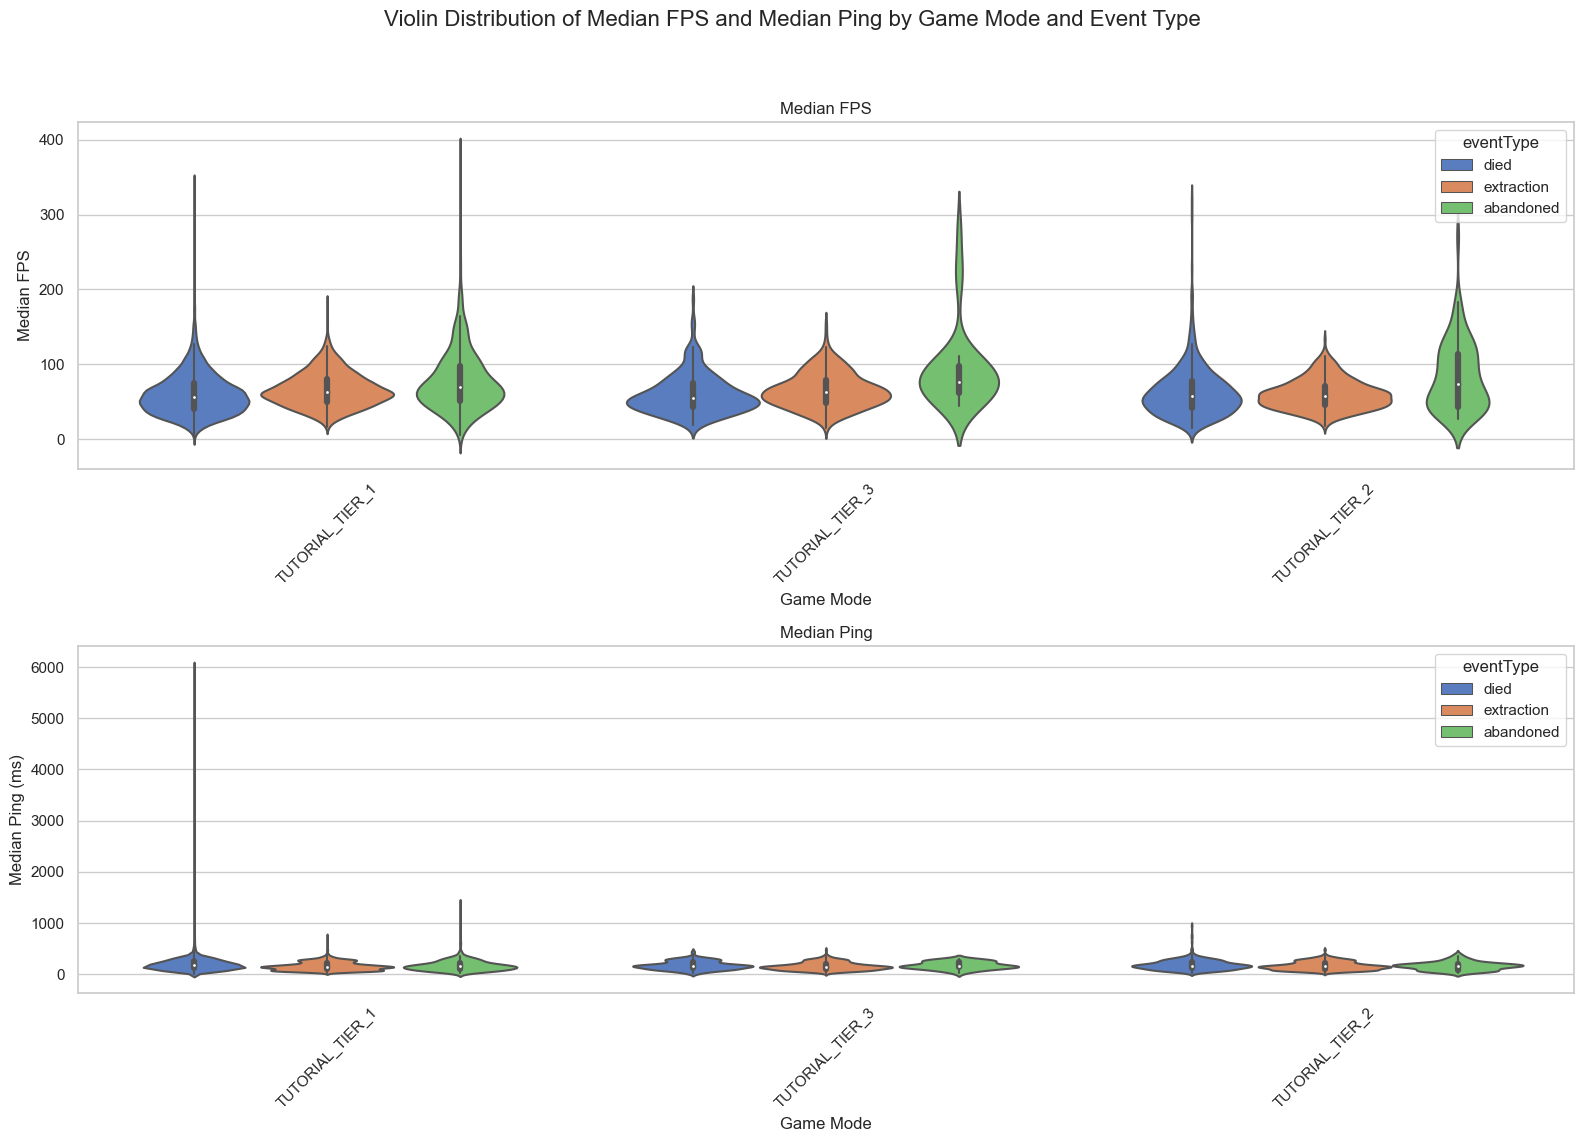

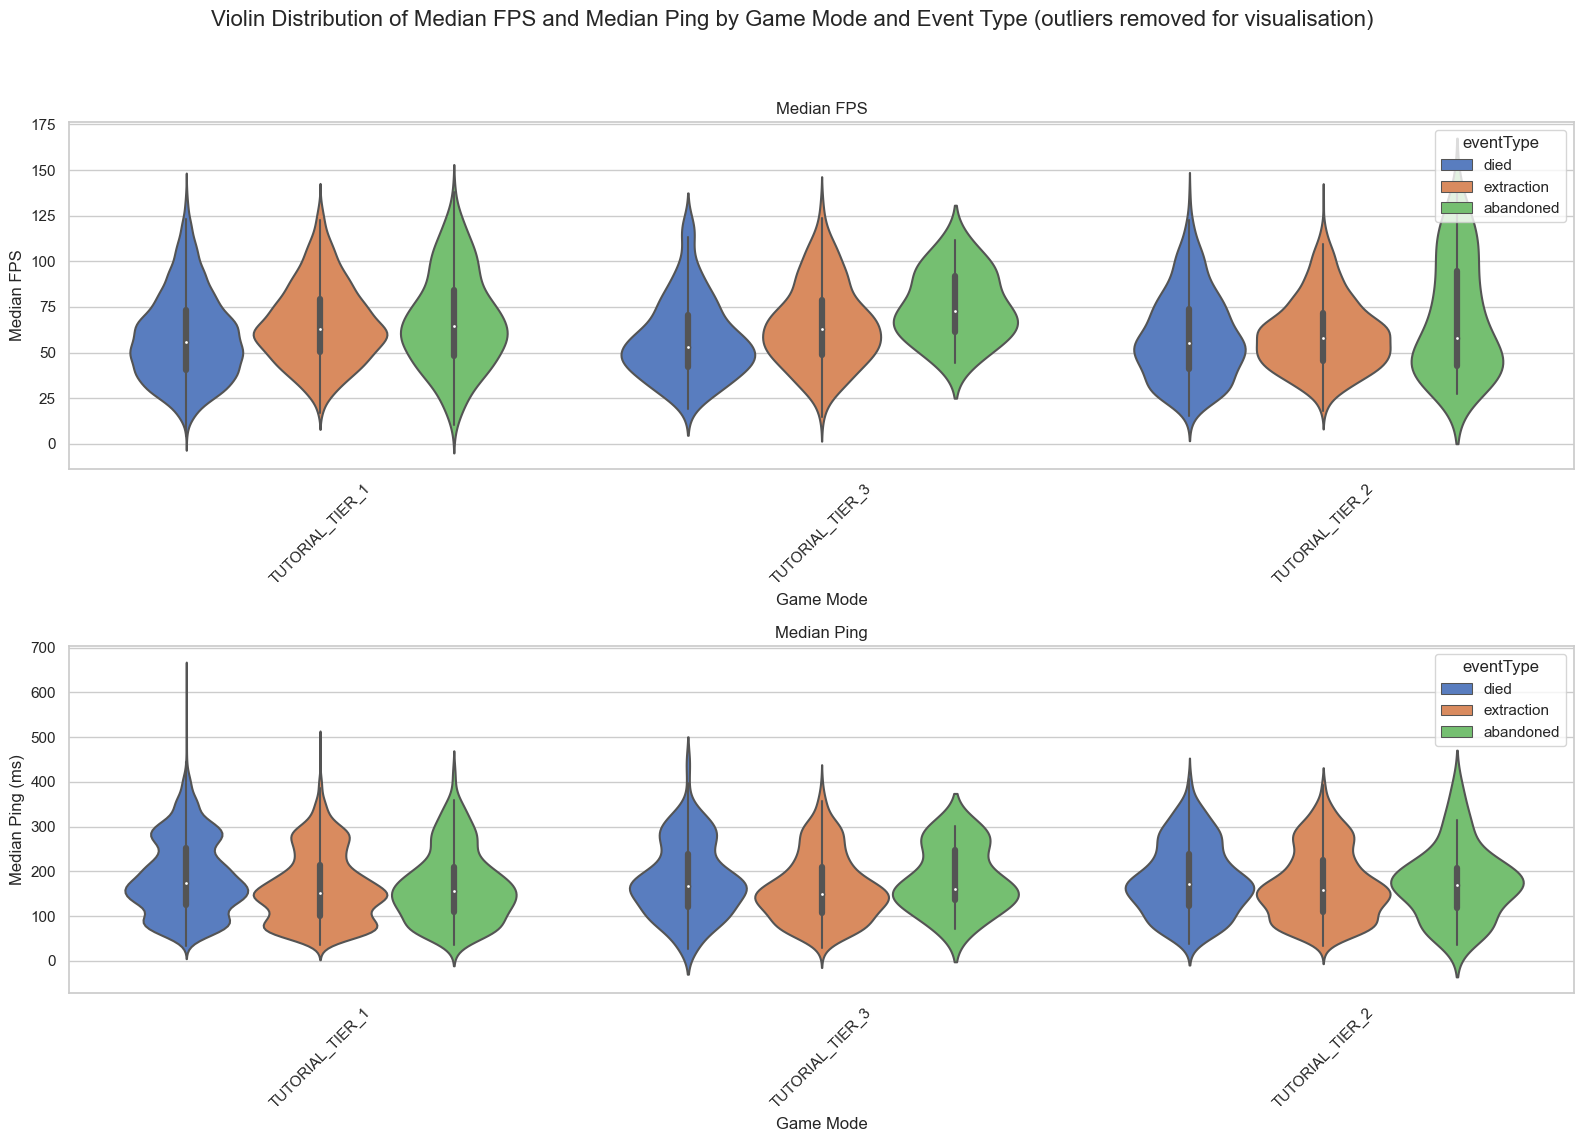

In [15]:
def eventType_violin_plots(data, title):
    # Set up the plotting style
    sns.set(style="whitegrid")

    # Define figure size and subplots
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(title, fontsize=16)

    # Violin plot for median FPS
    sns.violinplot(data, x="gameModeName", y="median_fps", hue="eventType", ax=axs[0], palette="muted", dodge=True)
    axs[0].set_title("Median FPS")
    axs[0].set_xlabel("Game Mode")
    axs[0].set_ylabel("Median FPS")
    axs[0].tick_params(axis="x", rotation=45)

    # Violin plot for median Ping
    sns.violinplot(data, x="gameModeName", y="median_ping", hue="eventType", ax=axs[1], palette="muted", dodge=True)
    axs[1].set_title("Median Ping")
    axs[1].set_xlabel("Game Mode")
    axs[1].set_ylabel("Median Ping (ms)")
    axs[1].tick_params(axis="x", rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    
eventType_violin_plots(df_tutorial,"Violin Distribution of Median FPS and Median Ping by Game Mode and Event Type")
eventType_violin_plots(df_tutorial_no_outliers,"Violin Distribution of Median FPS and Median Ping by Game Mode and Event Type (outliers removed for visualisation)")



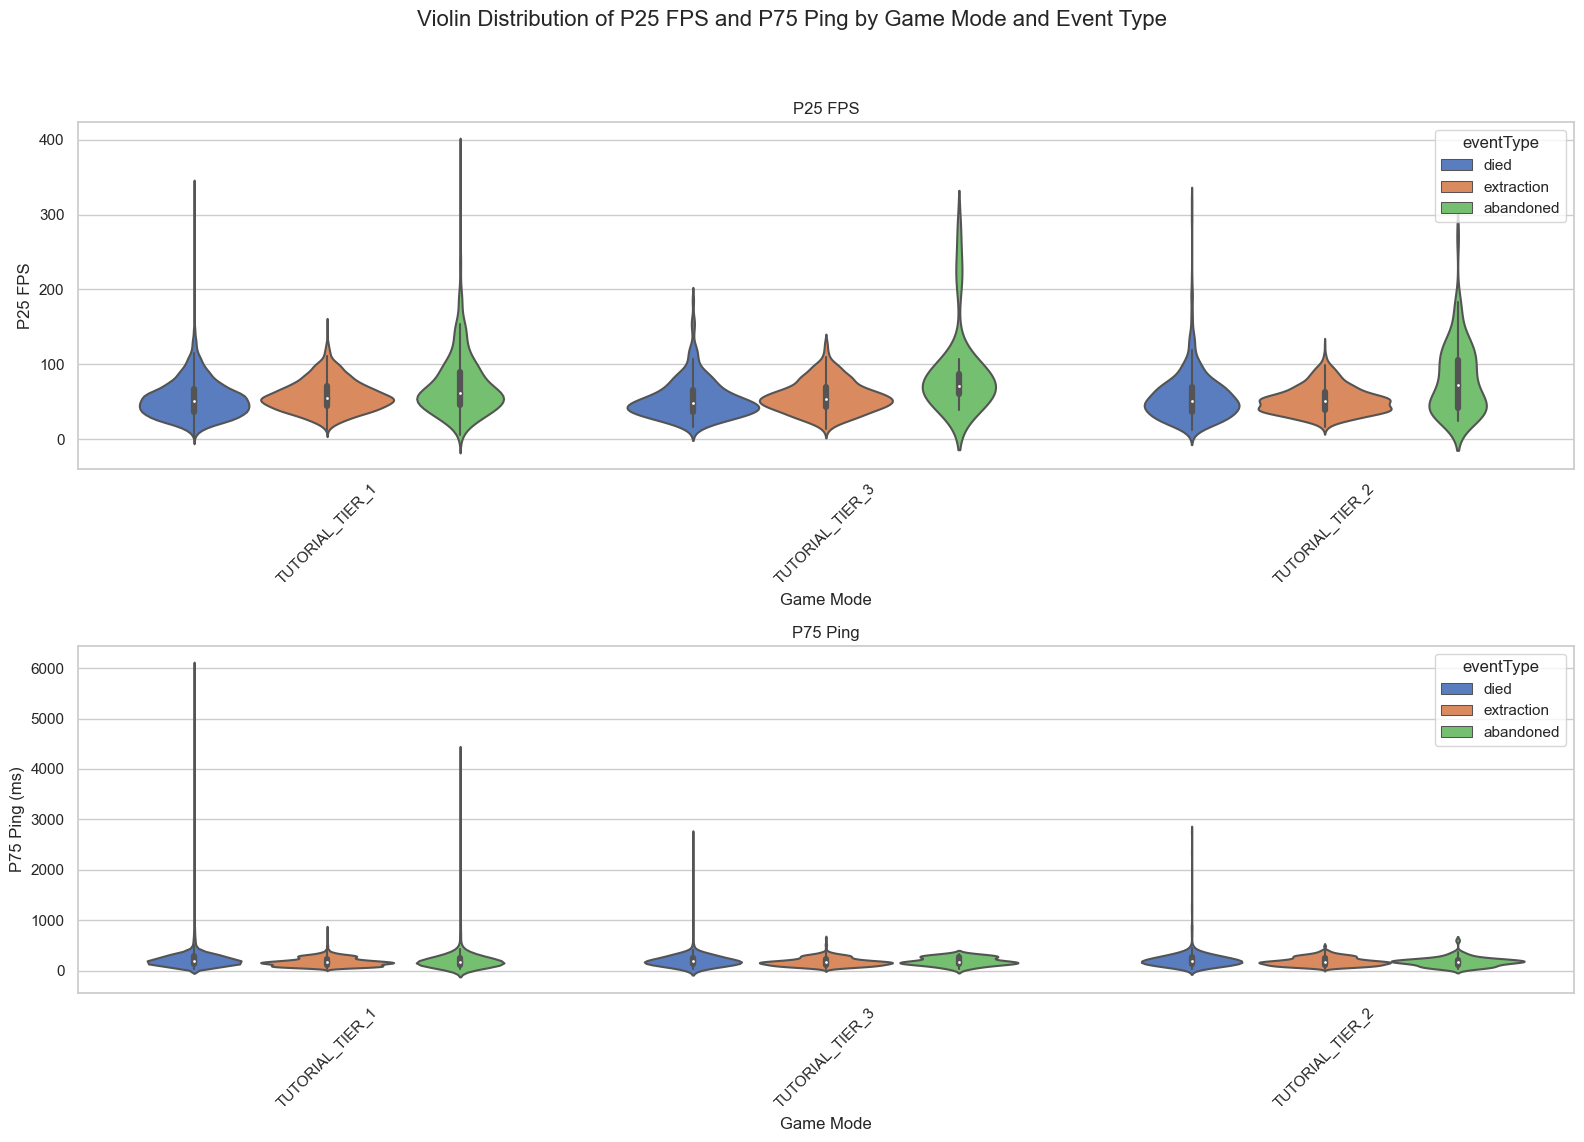

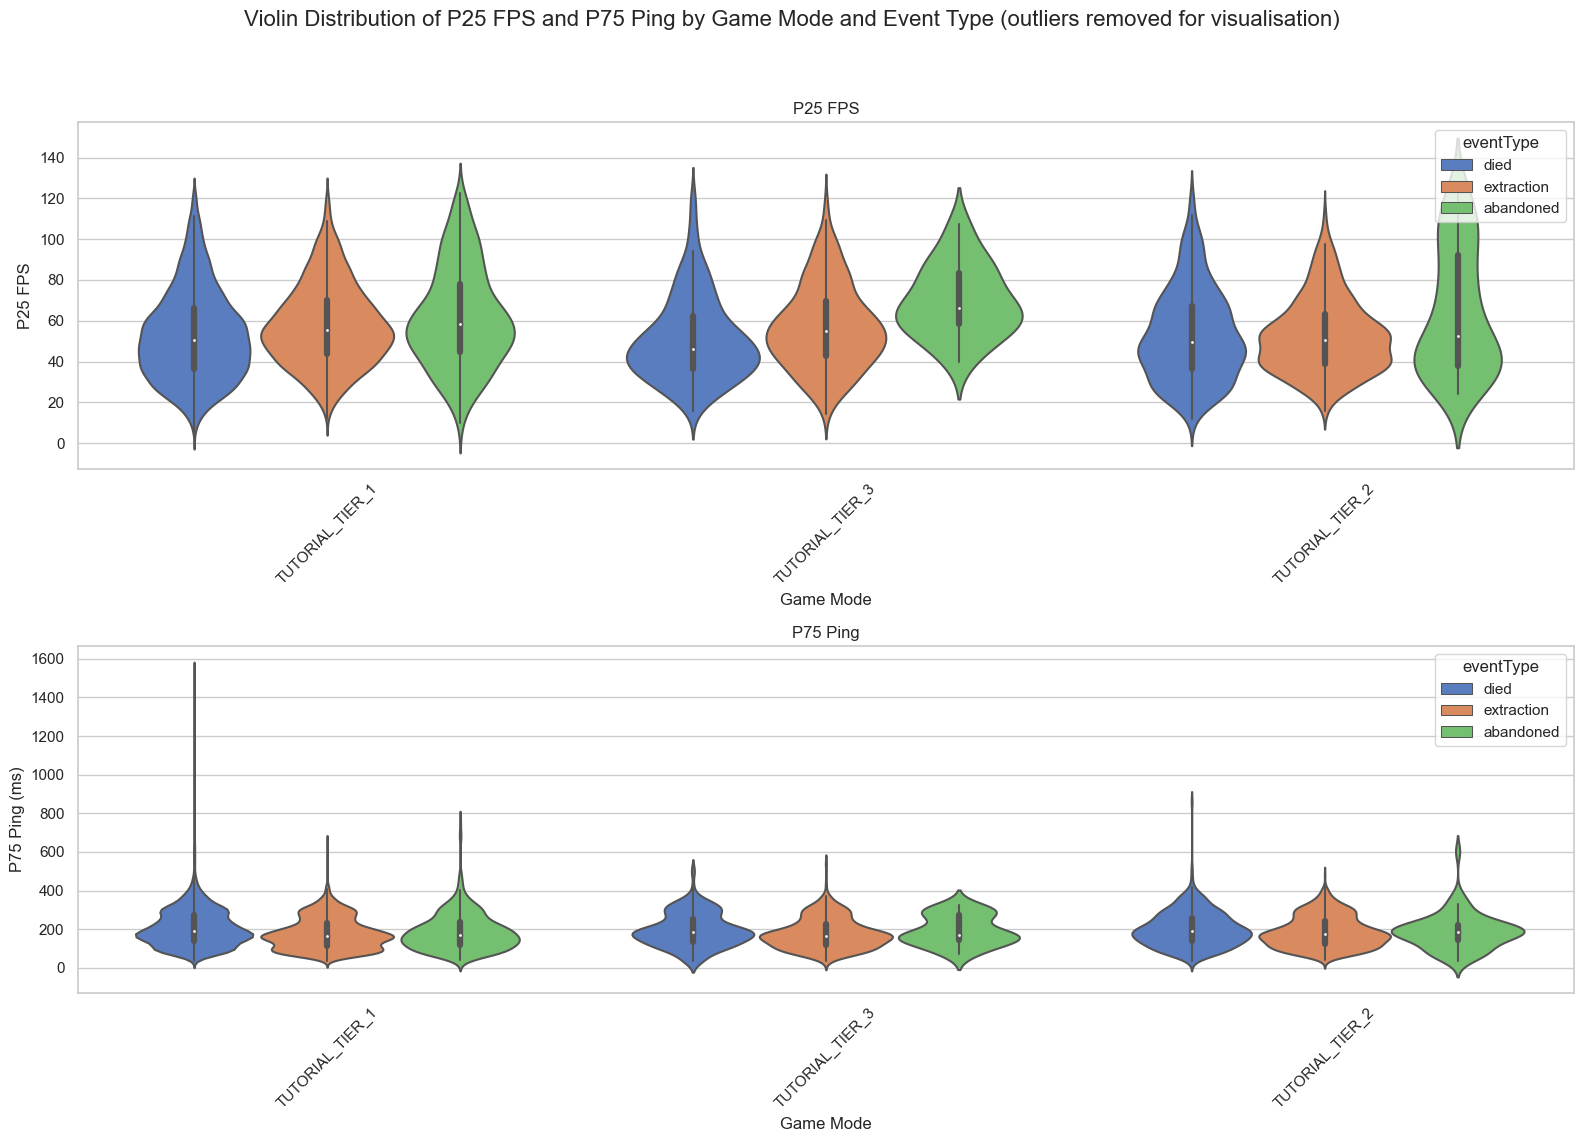

In [16]:
def eventType_violin_plots(data, title):
    # Set up the plotting style
    sns.set(style="whitegrid")

    # Define figure size and subplots
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(title, fontsize=16)

    # Violin plot for median FPS
    sns.violinplot(data, x="gameModeName", y="p25_fps", hue="eventType", ax=axs[0], palette="muted", dodge=True)
    axs[0].set_title("P25 FPS")
    axs[0].set_xlabel("Game Mode")
    axs[0].set_ylabel("P25 FPS")
    axs[0].tick_params(axis="x", rotation=45)

    # Violin plot for median Ping
    sns.violinplot(data, x="gameModeName", y="p75_ping", hue="eventType", ax=axs[1], palette="muted", dodge=True)
    axs[1].set_title("P75 Ping")
    axs[1].set_xlabel("Game Mode")
    axs[1].set_ylabel("P75 Ping (ms)")
    axs[1].tick_params(axis="x", rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    
eventType_violin_plots(df_tutorial,"Violin Distribution of P25 FPS and P75 Ping by Game Mode and Event Type")
eventType_violin_plots(df_tutorial_no_outliers,"Violin Distribution of P25 FPS and P75 Ping by Game Mode and Event Type (outliers removed for visualisation)")


In [21]:
# Filter out rows where isDC is True (since ping could be meaningless)
df_valid = df_tutorial[df_tutorial['isDC'] == False].dropna(
    subset=['median_fps', 'median_ping', 'p25_fps', 'p75_ping']
).copy()


In [25]:
dungeons = ['TUTORIAL_TIER_1', 'TUTORIAL_TIER_2', 'TUTORIAL_TIER_3']
metrics = ['median_fps', 'median_ping', 'p25_fps', 'p75_ping']

for dungeon in dungeons:
    df_d = df_valid[df_valid['gameModeName'] == dungeon]
    
    for metric in metrics:
        # For each metric, gather data by event type
        # (Check that all event types exist in this dungeon or handle empty groups)
        data_died       = df_d[df_d['eventType'] == 'died'][metric].dropna()
        data_extraction = df_d[df_d['eventType'] == 'extraction'][metric].dropna()
        data_abandoned  = df_d[df_d['eventType'] == 'abandoned'][metric].dropna()
        
        # If any group is empty, skip
        if data_died.empty or data_extraction.empty or data_abandoned.empty:
            print(f"No data for one of the event types in {dungeon} for {metric}, skipping.")
            continue
        
        # One-way ANOVA
        H_stat, p_val_H = kruskal(data_died, data_extraction, data_abandoned)
        f_stat, p_val_f = f_oneway(data_died, data_extraction, data_abandoned)
        
        print(f"{dungeon} - {metric}: F={f_stat:.4f}, p={p_val_f:.4e}")
        print(f"{dungeon} - {metric}: H={H_stat:.4f}, p={p_val_H:.4e}")
        print('\n')


TUTORIAL_TIER_1 - median_fps: F=140.6418, p=4.5494e-61
TUTORIAL_TIER_1 - median_fps: H=286.7447, p=5.4223e-63


TUTORIAL_TIER_1 - median_ping: F=74.3762, p=8.0681e-33
TUTORIAL_TIER_1 - median_ping: H=246.6204, p=2.7993e-54


TUTORIAL_TIER_1 - p25_fps: F=132.0071, p=2.0931e-57
TUTORIAL_TIER_1 - p25_fps: H=207.6077, p=8.2900e-46


TUTORIAL_TIER_1 - p75_ping: F=81.0369, p=1.1292e-35
TUTORIAL_TIER_1 - p75_ping: H=276.0241, p=1.1538e-60


TUTORIAL_TIER_2 - median_fps: F=27.0593, p=2.7353e-12
TUTORIAL_TIER_2 - median_fps: H=13.0446, p=1.4702e-03


TUTORIAL_TIER_2 - median_ping: F=5.8469, p=2.9490e-03
TUTORIAL_TIER_2 - median_ping: H=8.9519, p=1.1379e-02


TUTORIAL_TIER_2 - p25_fps: F=40.3504, p=7.7868e-18
TUTORIAL_TIER_2 - p25_fps: H=18.5622, p=9.3169e-05


TUTORIAL_TIER_2 - p75_ping: F=8.3739, p=2.4078e-04
TUTORIAL_TIER_2 - p75_ping: H=11.0274, p=4.0312e-03


TUTORIAL_TIER_3 - median_fps: F=22.1018, p=5.0613e-10
TUTORIAL_TIER_3 - median_fps: H=30.2851, p=2.6526e-07


TUTORIAL_TIER_3 - media

In [27]:
for dungeon in dungeons:
    df_d = df_valid[df_valid['gameModeName'] == dungeon].copy()
    
    # Make sure eventType is categorical
    df_d['eventType'] = df_d['eventType'].astype('category')
    
    # For each numeric metric, do Tukey's if you found ANOVA significant
    for metric in metrics:
        # Filter out rows without data
        df_metric = df_d.dropna(subset=[metric, 'eventType'])
        
        # If any group has no data, skip
        if len(df_metric) == 0 or df_metric['eventType'].nunique() < 2:
            continue
        
        print(f"\n=== {dungeon} | {metric} | Tukey's HSD ===")

        # Perform Tukey's test
        tukey_result = pairwise_tukeyhsd(
            endog=df_metric[metric], 
            groups=df_metric['eventType'], 
            alpha=0.05
        )
        print(tukey_result)


=== TUTORIAL_TIER_1 | median_fps | Tukey's HSD ===
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2   meandiff p-adj  lower    upper   reject
------------------------------------------------------------
abandoned       died -17.7364   0.0 -20.6496 -14.8232   True
abandoned extraction  -11.433   0.0 -14.5039  -8.3622   True
     died extraction   6.3034   0.0   4.9003   7.7064   True
------------------------------------------------------------

=== TUTORIAL_TIER_1 | median_ping | Tukey's HSD ===
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2   meandiff p-adj   lower    upper   reject
-------------------------------------------------------------
abandoned       died  30.2519 0.0002  12.3908   48.113   True
abandoned extraction  -13.563 0.2096 -32.3906   5.2646  False
     died extraction -43.8149    0.0 -52.4172 -35.2127   True
-------------------------------------------------------------

=== TUTORIAL_TIER_1 | p25_fps | T

In [29]:
df_valid = df_tutorial[
    (df_tutorial['isDC'] == False) &      # Only valid rows
    (df_tutorial['eventType'].notna()) &
    (df_tutorial['median_fps'].notna()) &
    (df_tutorial['median_ping'].notna())
].copy()

# 2. Select your features (X) and outcome (y)
X = df_valid[['median_fps', 'median_ping']]
y = df_valid['eventType']  # eventType has values like "died", "extraction", "abandoned"

# 3. Encode the eventType (string) to numeric labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
# For example, le.classes_ might be ["abandoned", "died", "extraction"],
# and y_enc then becomes 0,1,2 accordingly.

# 4. Create and fit your LogisticRegression model
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',          # 'lbfgs' is a common choice; 'sag' or 'saga' also work
    max_iter=1000            # increase iterations if needed
)
model.fit(X, y_enc)

# 5. Check the results
print("Classes in the order of coefficients:", le.classes_)
print("Intercepts (per class):", model.intercept_)
print("Coefficients (per class):")
print(model.coef_)

Classes in the order of coefficients: ['abandoned' 'died' 'extraction']
Intercepts (per class): [-2.32313253  1.33475604  0.98837649]
Coefficients (per class):
[[ 0.01064358  0.00038611]
 [-0.00710392  0.00143659]
 [-0.00353966 -0.0018227 ]]
